<center> <b>Modeling Part-1 </b><br>
    
In this program, face recognition was performed using the face images in the Olivetti data set which we downloaded from kaggle. 

The steps for face recognition are as follows:

1) Principal components of face images were obtained by PCA. <br>
2) Adequate number of principal components determined. <br>
3) According to three different classification models, accuracy score will be checked.<br>

Brief information about Olivetti Dataset:

1)Face images taken between April 1992 and April 1994.<br>
2)There are ten different image of each of 40 distinct people<br>
3)There are 400 face images in the dataset<br>
4)The images are gray level<br>
5)Size of each image is 64x64<br>
6)Image pixel values were scaled to [0, 1] interval<br>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 

#Visualization
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [4]:
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

print (np.array(data).shape)
print (np.array(target).shape)

(400, 64, 64)
(400,)


we can use below code to convert data file to csv file and read using pandas library aswell.

In [5]:
#faces_data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
#X = faces_data
#df= pd.DataFrame(X)
#df.to_csv("face_data.csv", index=False)

#df = pd.read_csv("face_data.csv")

In [6]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [7]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset") 


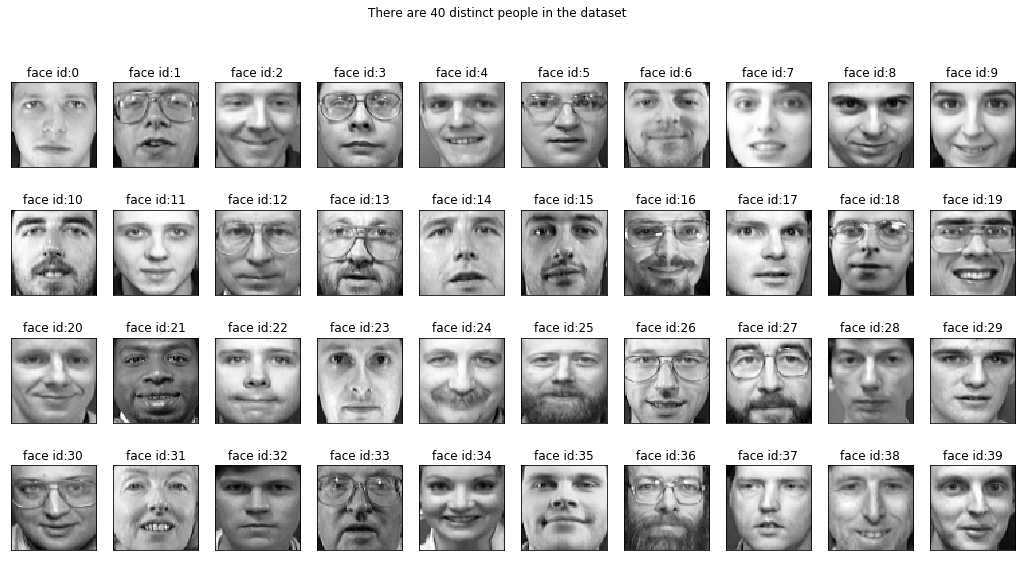

In [8]:
show_40_distinct_people(data, np.unique(target))

In [9]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    

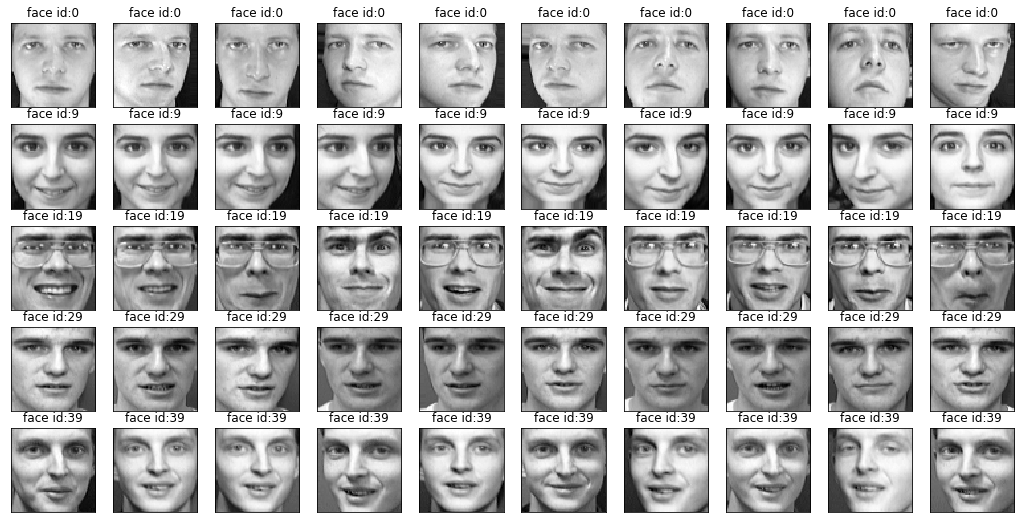

In [30]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[0,9, 19, 29, 39])

We reshape images for machine learnig  model because ML models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.


In [31]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))

print("X shape:",X.shape)

X shape: (400, 4096)


 Split data into train and test Subsets.

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.2, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (320, 4096)
y_train shape: (320,)
X_test shape: (80, 4096)
y_test shape: (80,)


PCA Projection of Defined Number of Target

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

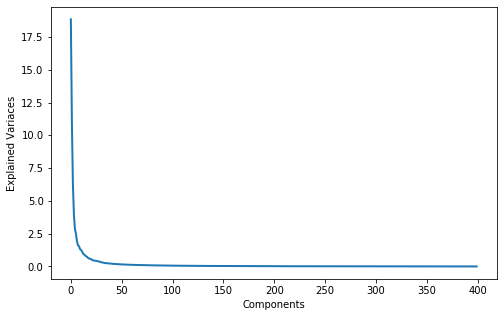

In [35]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(8,5))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

<b>In the figure above, it can be seen that 90 and more PCA components represent the same data. So we can use 90 PCA components.

In [36]:
n_components=90

In [37]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

Text(0.5, 1.0, 'Average Face')

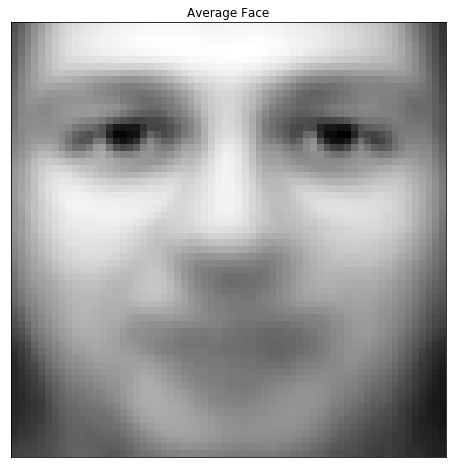

In [38]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

In [39]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

 <b>1) Classification Results using SVM (Support Vector Machine is a linear model for classification problems)

In [41]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

accuracy score: 0.9375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         2
    

C:\Users\19059\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<b>2) Classification Results using logistic algorithm.

In [42]:
log_model = LogisticRegression()
log_model.fit(X_train_pca, y_train)
y_pred_log=log_model.predict(X_test_pca)

print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_log)))
print(metrics.classification_report(y_test, y_pred_log))

accuracy score:0.94
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
       

C:\Users\19059\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\19059\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<b>3) Classification Results using KNN algorithm.

In [43]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_pca, y_train)
y_pred_knn=knn_model.predict(X_test_pca)

print("accuracy score:", metrics.accuracy_score(y_test,y_pred_knn))
print(metrics.classification_report(y_test, y_pred_knn))

accuracy score: 0.75
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       0.50      0.50      0.50         2
           4       0.50      0.50      0.50         2
           5       0.67      1.00      0.80         2
           6       1.00      0.50      0.67         2
           7       1.00      0.50      0.67         2
           8       0.67      1.00      0.80         2
           9       0.67      1.00      0.80         2
          10       0.67      1.00      0.80         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       0.40      1.00      0.57         2
          15       0.00      0.00      0.00         2
          16       1.00      1.00      1.00         2
      

C:\Users\19059\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<b>4) Classification Results using Decisiontree algorithm.

In [44]:
dec_model = DecisionTreeClassifier()
dec_model.fit(X_train_pca, y_train)
y_pred_dec=dec_model.predict(X_test_pca)

print("accuracy score:", metrics.accuracy_score(y_test,y_pred_dec))
print(metrics.classification_report(y_test, y_pred_dec))

accuracy score: 0.5625
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       1.00      0.50      0.67         2
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         2
           4       0.50      0.50      0.50         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       0.50      0.50      0.50         2
           8       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         2
          10       0.67      1.00      0.80         2
          11       0.67      1.00      0.80         2
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         2
          15       0.25      0.50      0.33         2
          16       0.50      0.50      0.50         2
    

C:\Users\19059\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [45]:
models=[]
models.append(("SVM",SVC()))
models.append(("LR",LogisticRegression()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))

score=[]
for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    score1= (metrics.accuracy_score(y_test, y_pred))
    score.append(score1)
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== SVM RESULT ==========
Accuracy score:0.94

========== LR RESULT ==========
Accuracy score:0.94

========== KNN RESULT ==========
Accuracy score:0.75

========== DT RESULT ==========
Accuracy score:0.59



C:\Users\19059\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\19059\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\19059\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


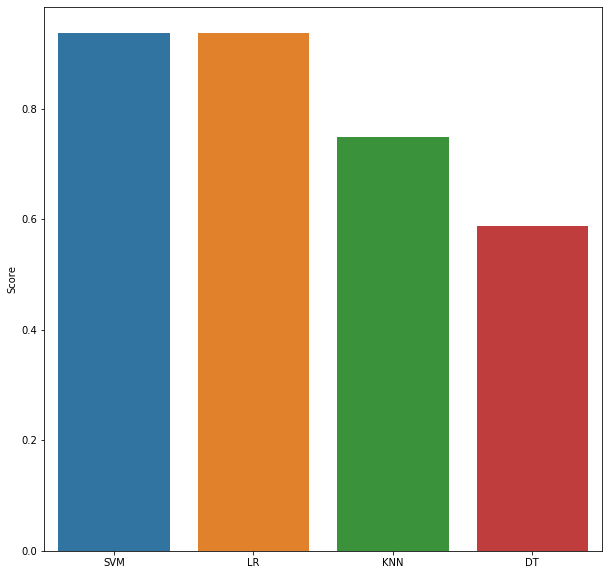

In [64]:
import seaborn as sns
list_regressors = ['SVM','LR', 'KNN','DT']

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(x=list_regressors, y=score, ax=ax)
plt.ylabel('Score')
plt.show()

<b>Observations:- According to the above results, SVM and Logistic Regression seems to have the good performances, KNN has an average performance.

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))


SVM mean cross validations score:0.87
LR mean cross validations score:0.96
KNN mean cross validations score:0.70
DT mean cross validations score:0.46
